## Prévision des crédits de logements

### Problématique
Prévoir si on peut faire de pret a un client en fonction de son profil

In [167]:
#Importation des packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

## Ouvrir la base de données


In [11]:
data_credit=pd.read_csv("data/train.csv")

In [12]:
data_credit.sample(13)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
307,LP001994,Female,No,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,Urban,N
394,LP002266,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban,Y
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
255,LP001846,Female,No,3+,Graduate,No,3083,0.0,255.0,360.0,1.0,Rural,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
309,LP001998,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,NaN,Rural,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
273,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y


In [13]:
df=data_credit.copy()

### Découverte

In [15]:
#On va faire du nétoyage


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
df.shape

(614, 13)

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Pour supprimer les valeurs manquantes:
   -Pour les variables catégoriques :on va remplacer par le mode de la colonne
   -Pour les variables numériques on va les remplacer par la moyenne ou médiane

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [85]:
var_cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status','Credit_History']
var_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term',]
print('Les variables catégoriques sont :',var_cat)
print("Les variables numériques sont:",var_num)

Les variables catégoriques sont : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']
Les variables numériques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [25]:
#Supprimer les valeurs manquantes sur les var catégoriques

In [27]:
for var in var_cat:
    df[var].fillna(df[var].mode()[0],inplace=True)

In [28]:
#Supprimer les valeurs manquantes sur les var manquantes
for var in var_num:
    df[var].fillna(df[var].mode()[0],inplace=True)

In [29]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Analyse

In [34]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [38]:
import seaborn as sns

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

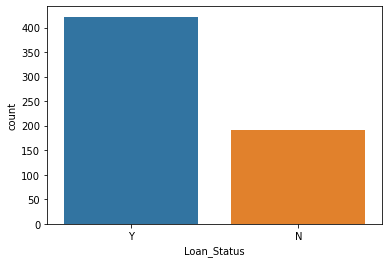

In [40]:
sns.countplot(x="Loan_Status",data=df)

<AxesSubplot:title={'center':'Crédit accordé ou pas'}>

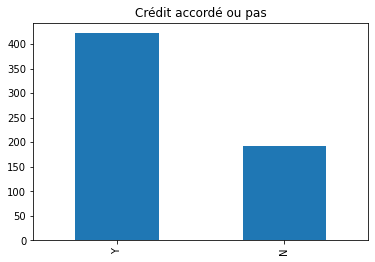

In [42]:
df['Loan_Status'].value_counts().plot.bar(title="Crédit accordé ou pas")

#### Remarque
La banque a plus tendance a faire des prets au clients

### Analyse des variables catégoriques univariés

In [43]:
#Gender
df["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [49]:
df["Gender"].value_counts(normalize=True)*100

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

<AxesSubplot:>

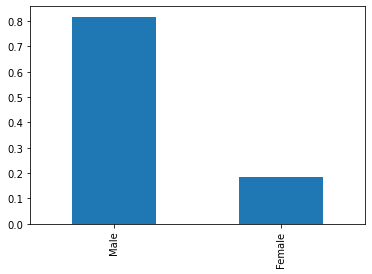

In [48]:
df["Gender"].value_counts(normalize=True).plot.bar()

#### Remarque
Les hommes ont plus tendances a faire des crédits plus que les femmes

In [51]:
#Married
df["Married"].value_counts(normalize="True")*100

Yes    65.309446
No     34.690554
Name: Married, dtype: float64

<AxesSubplot:title={'center':'Fréquence'}>

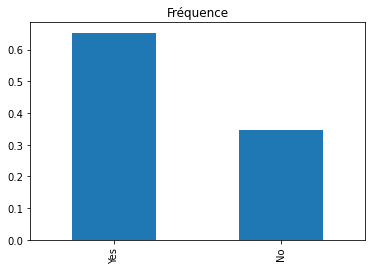

In [52]:
df["Married"].value_counts(normalize="True").plot.bar(title="Fréquence")

In [55]:
df['Dependents'].value_counts(normalize=True)*100

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

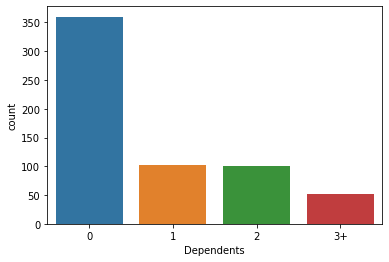

In [56]:
sns.countplot(x=df['Dependents'])

 ### Analyse des variables numériques univariés
 

In [61]:
df[var_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.465798,84.180967,9.0,100.25,125.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


D:\Developpement\Coding\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Developpement\Coding\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

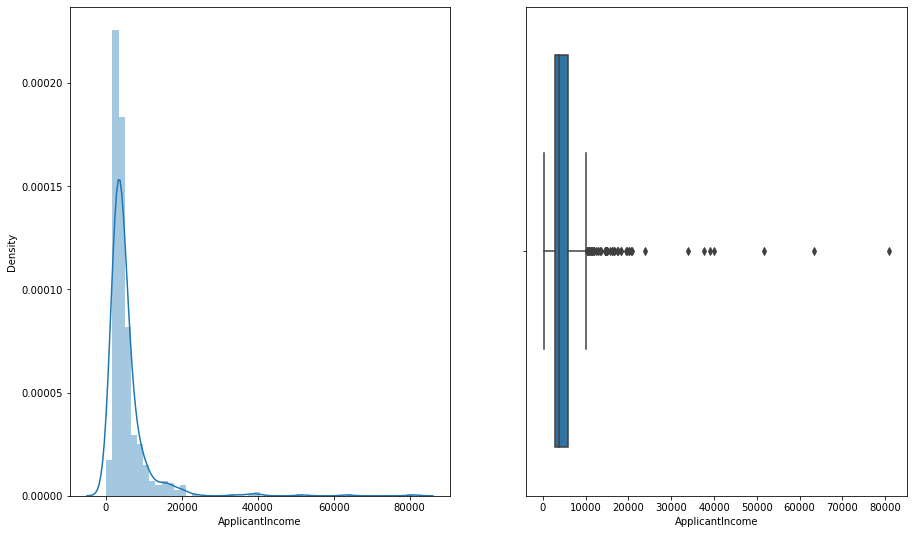

In [67]:
#Visualisation ApplicantIncome
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1,2,2)
sns.boxplot(df["ApplicantIncome"])

D:\Developpement\Coding\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Developpement\Coding\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

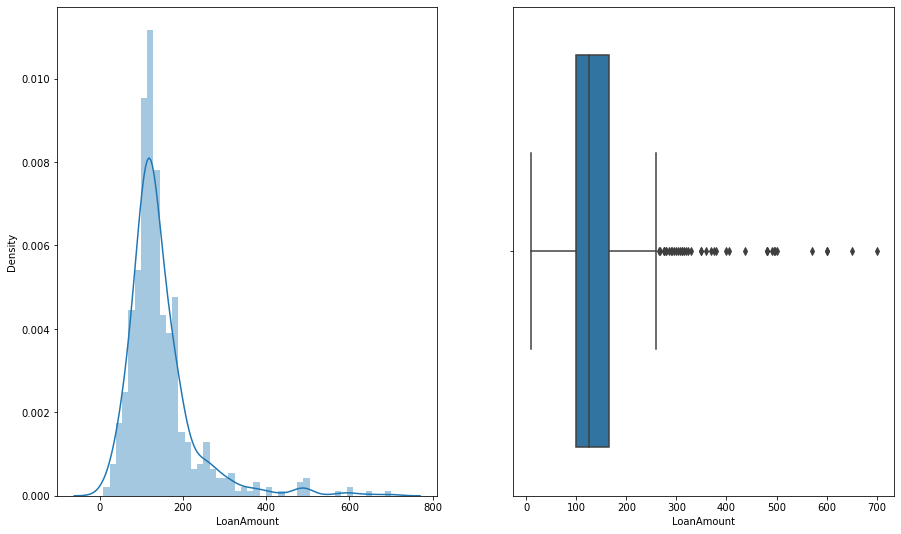

In [68]:
#Visualisation ApplicantIncome
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'])
plt.subplot(1,2,2)
sns.boxplot(df["LoanAmount"])

## Analyse bivariée

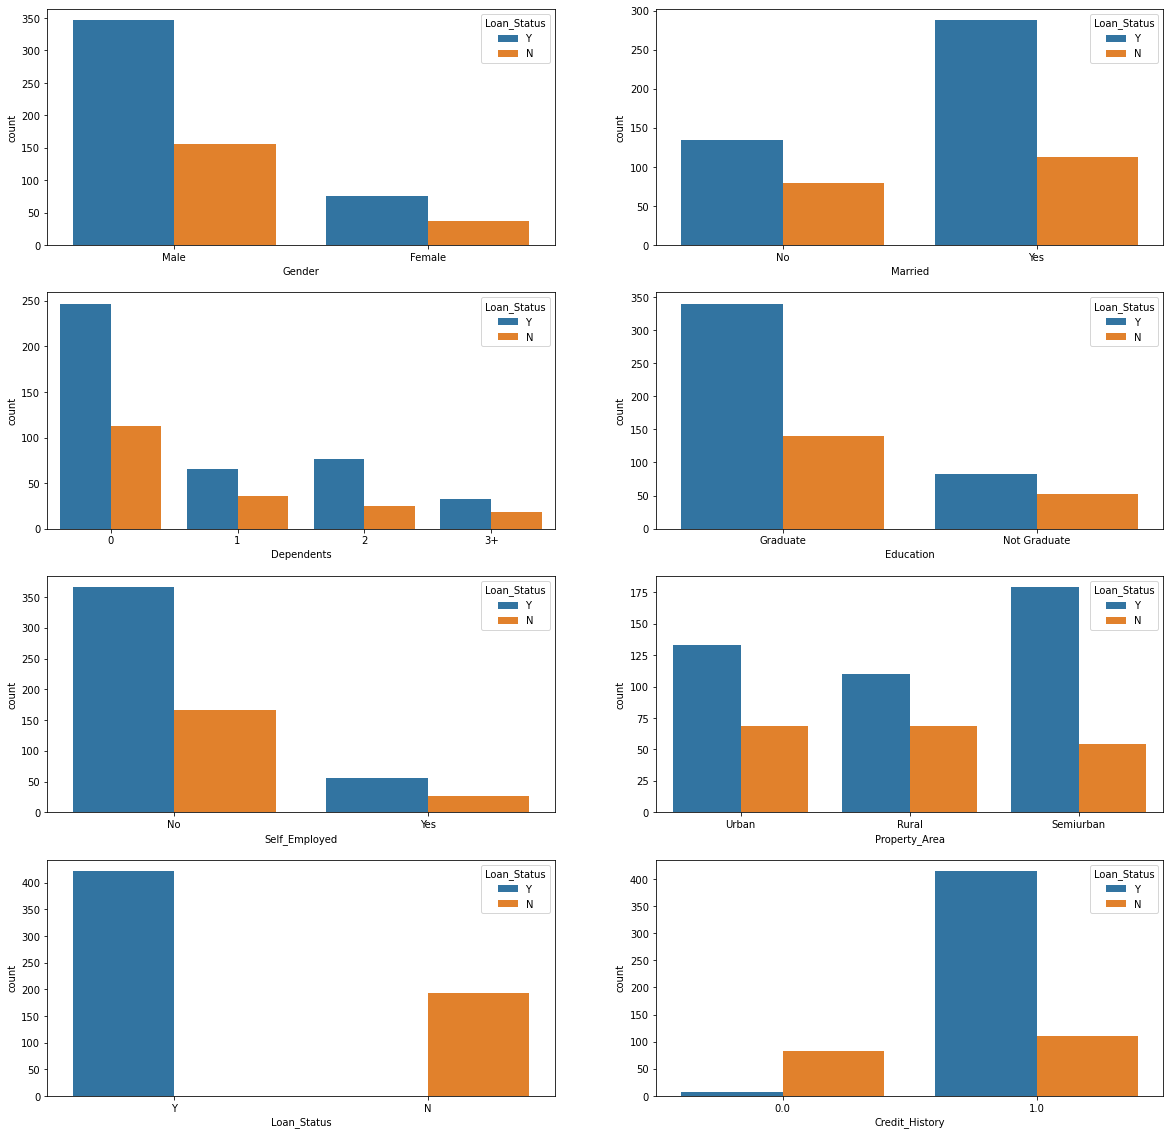

In [87]:
plt.figure(figsize=(20,20))
for i in range(len(var_cat)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[var_cat[i]],hue=df['Loan_Status'])
    
    
    


In [89]:
#Correlationn des valeurs numérques
matrix=df.corr()


<AxesSubplot:>

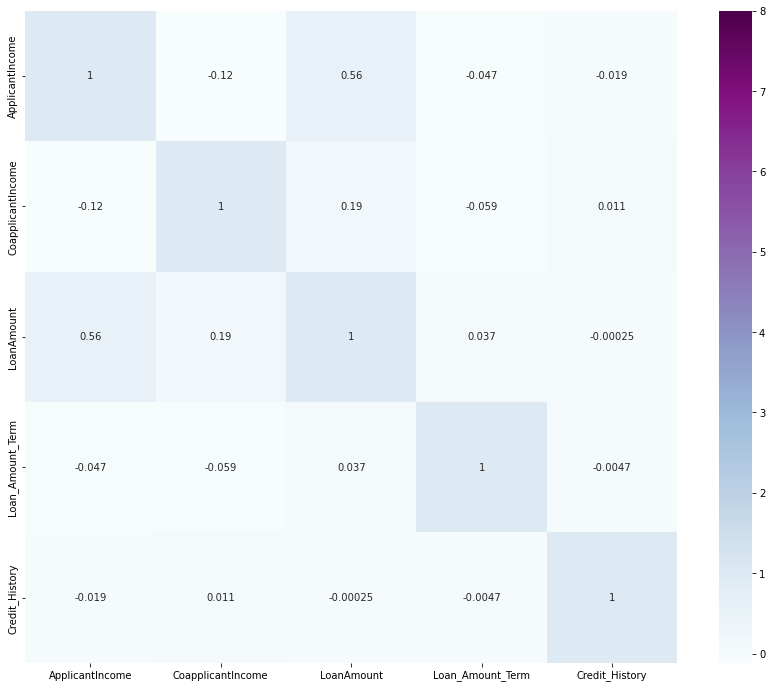

In [91]:
plt.figure(figsize=(15,12))
sns.heatmap(matrix,vmax=8,square=True,cmap='BuPu',annot=True)

## Préparation de la Data

In [92]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [95]:
df_cat=df[var_cat]

In [96]:
df_cat=pd.get_dummies(df_cat,drop_first=True)

In [98]:
df_cat
df_num=df[var_num]

In [118]:
df_encoded=pd.concat([df_cat,df_num],axis=1)

In [119]:
df_encoded

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,120.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [120]:
##Target
y=df_encoded['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [121]:
##Feartures
X=df_encoded.drop('Loan_Status_Y',axis=1)

In [122]:
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,120.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0


In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [125]:
#Normalisation
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


array([[1.        , 1.        , 1.        , ..., 0.0875    , 0.31982634,
        0.61538462],
       [1.        , 1.        , 0.        , ..., 0.08965   , 0.15629522,
        0.74358974],
       [1.        , 1.        , 1.        , ..., 0.09915   , 0.18958032,
        0.35897436],
       ...,
       [1.        , 1.        , 1.        , ..., 0.04985   , 0.0593343 ,
        0.74358974],
       [1.        , 1.        , 0.        , ..., 0.        , 0.1316932 ,
        0.48717949],
       [1.        , 1.        , 1.        , ..., 0.        , 0.19536903,
        0.74358974]])

### Model

In [146]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [151]:
model.score(X_test,y_test)

0.7723577235772358

In [164]:
profil_test=[[0,0,0,0,0,0,1,0,1,0,100,0,400,360]]

In [165]:
pr=scaler.transform(profil_test)

In [166]:
model.predict(pr)

array([0], dtype=uint8)

In [145]:
accuracy_score(y_test,pred)

0.7723577235772358

In [168]:
#Enregistrer le modele
pickle.dump(model,open("prevision_credit.pkl","wb"))